In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Finding correlation between the variables

In [7]:
correlation = df.corr()

<AxesSubplot:>

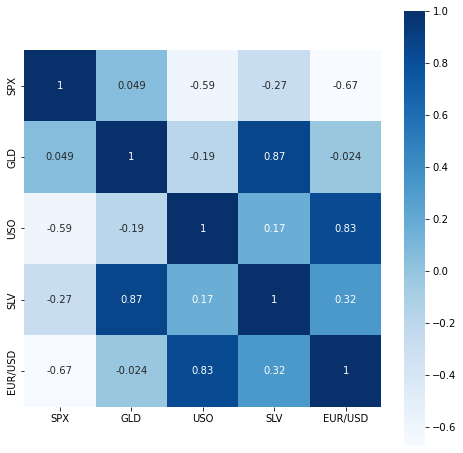

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, annot=True, cmap='Blues')

# Gold and silver are positively correlated, gold and USO are negatively correlated

In [12]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

# Distribution plot of gold data

D:\Data_Science\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

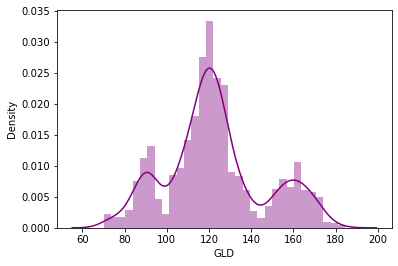

In [13]:
sns.distplot(df['GLD'], color='purple')

In [15]:
x = df.drop(['Date','GLD'],axis='columns')
y = df['GLD']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [23]:
regressor.predict(x_test)

array([168.63009961,  81.81899992, 116.19340051, 127.50020058,
       120.68970164, 154.74019772, 149.80839852, 126.19600015,
       117.655399  , 125.95650124, 116.70440076, 172.39000063,
       141.38569845, 167.78009822, 115.06490015, 117.98850017,
       138.55010345, 170.15640111, 159.38820234, 159.55689912,
       155.23730035, 125.19130024, 175.60329947, 157.08650271,
       125.19630036,  93.79759979,  77.36620002, 120.45730011,
       119.05319949, 167.47879925,  88.09410061, 125.3445001 ,
        91.18220087, 117.60169988, 121.26429916, 135.94450047,
       115.5036013 , 115.29570032, 149.28279999, 107.13310082,
       104.09320232,  87.1857981 , 126.61880059, 118.06380043,
       152.50719862, 119.5884997 , 108.21630036, 108.19379813,
        93.18600057, 127.02399801,  74.72600058, 113.74449911,
       121.11160043, 111.36359933, 118.84719887, 120.93839892,
       159.64420009, 167.21140057, 146.94819652,  86.08199861,
        94.32190023,  86.9277986 ,  90.59959994, 119.07

In [25]:
regressor.score(x_test,y_test)

0.9890746688869685

# The model gave 98.9% Accuracy